In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
from collections import Counter
import os

In [1]:
%run download.py

Criando diretório: votacoesVotos

--- BAIXANDO ARQUIVOS CSV DE DADOS ---
Baixando de https://dadosabertos.camara.leg.br/arquivos/votacoes/csv/votacoes-2019.csv para votacoesVotos/votacoes-2019.csv...


votacoes-2019.csv: 100%|██████████| 5.81M/5.81M [00:00<00:00, 25.9MiB/s]


Baixando de https://dadosabertos.camara.leg.br/arquivos/proposicoes/csv/proposicoes-2019.csv para votacoesVotos/proposicoes-2019.csv...


proposicoes-2019.csv: 100%|██████████| 33.0M/33.0M [00:00<00:00, 33.5MiB/s]


Baixando de https://dadosabertos.camara.leg.br/arquivos/votacoesVotos/csv/votacoesVotos-2019.csv para votacoesVotos/votacoesVotos-2019.csv...


votacoesVotos-2019.csv: 100%|██████████| 40.3M/40.3M [00:01<00:00, 25.3MiB/s]


Baixando de https://dadosabertos.camara.leg.br/arquivos/votacoes/csv/votacoes-2020.csv para votacoesVotos/votacoes-2020.csv...


votacoes-2020.csv: 100%|██████████| 1.25M/1.25M [00:00<00:00, 7.19MiB/s]


Baixando de https://dadosabertos.camara.leg.br/arquivos/proposicoes/csv/proposicoes-2020.csv para votacoesVotos/proposicoes-2020.csv...


proposicoes-2020.csv: 100%|██████████| 25.2M/25.2M [00:00<00:00, 33.8MiB/s]


Baixando de https://dadosabertos.camara.leg.br/arquivos/votacoesVotos/csv/votacoesVotos-2020.csv para votacoesVotos/votacoesVotos-2020.csv...


votacoesVotos-2020.csv: 100%|██████████| 53.1M/53.1M [00:02<00:00, 22.5MiB/s]


Baixando de https://dadosabertos.camara.leg.br/arquivos/votacoes/csv/votacoes-2021.csv para votacoesVotos/votacoes-2021.csv...


votacoes-2021.csv: 100%|██████████| 6.44M/6.44M [00:00<00:00, 28.2MiB/s]


Baixando de https://dadosabertos.camara.leg.br/arquivos/proposicoes/csv/proposicoes-2021.csv para votacoesVotos/proposicoes-2021.csv...


proposicoes-2021.csv: 100%|██████████| 34.3M/34.3M [00:02<00:00, 13.2MiB/s]


Baixando de https://dadosabertos.camara.leg.br/arquivos/votacoesVotos/csv/votacoesVotos-2021.csv para votacoesVotos/votacoesVotos-2021.csv...


votacoesVotos-2021.csv: 100%|██████████| 107M/107M [00:04<00:00, 25.3MiB/s] 


Baixando de https://dadosabertos.camara.leg.br/arquivos/votacoes/csv/votacoes-2022.csv para votacoesVotos/votacoes-2022.csv...


votacoes-2022.csv: 100%|██████████| 3.66M/3.66M [00:00<00:00, 20.0MiB/s]


Baixando de https://dadosabertos.camara.leg.br/arquivos/proposicoes/csv/proposicoes-2022.csv para votacoesVotos/proposicoes-2022.csv...


proposicoes-2022.csv: 100%|██████████| 23.0M/23.0M [00:00<00:00, 31.4MiB/s]


Baixando de https://dadosabertos.camara.leg.br/arquivos/votacoesVotos/csv/votacoesVotos-2022.csv para votacoesVotos/votacoesVotos-2022.csv...


votacoesVotos-2022.csv: 100%|██████████| 65.6M/65.6M [00:02<00:00, 22.5MiB/s]


# Votações de cada parlamentar

In [2]:
years = [2019, 2020, 2021, 2022]

total = 0

for year in years:
    path = os.path.join("votacoesVotos", f"votacoesVotos-{year}.csv")
    df = pd.read_csv(path, sep=";")
    num_unique = df["idVotacao"].nunique()

    total += num_unique

    print(f"[{year}] Número de diferentes idVotacao: {num_unique}")

print(f"Número total de diferentes idVotacao: {total}")


[2019] Número de diferentes idVotacao: 333
[2020] Número de diferentes idVotacao: 393
[2021] Número de diferentes idVotacao: 958
[2022] Número de diferentes idVotacao: 586
Número total de diferentes idVotacao: 2270


# Histograma de proposições

In [3]:
# Lista de anos
anos = [2019, 2020, 2021, 2022]

# Dicionário para armazenar todas as contagens de cada idVotacao
contagens = Counter()

for ano in anos:
    df = pd.read_csv(f"votacoesVotos/votacoesVotos-{ano}.csv", sep=";")
    
    # Conta quantas vezes cada idVotacao aparece nesse ano
    freq = df["idVotacao"].value_counts()
    
    # Atualiza o contador global
    contagens.update(freq.to_dict())


In [4]:
# Listas separadas
acima_250 = [id_v for id_v, count in contagens.items() if count >= 250]
abaixo_ou_igual_250 = [id_v for id_v, count in contagens.items() if count < 250]

# Escreve em arquivos TXT
with open("idVotacao_acima_250.txt", "w") as f:
    for id_v in acima_250:
        f.write(f"{id_v}\n")

with open("idVotacao_abaixo_ou_igual_250.txt", "w") as f:
    for id_v in abaixo_ou_igual_250:
        f.write(f"{id_v}\n")

print(f"Salvo {len(acima_250)} idVotacao em 'idVotacao_acima_250.txt'")
print(f"Salvo {len(abaixo_ou_igual_250)} idVotacao em 'idVotacao_abaixo_ou_igual_250.txt'")


Salvo 1971 idVotacao em 'idVotacao_acima_250.txt'
Salvo 299 idVotacao em 'idVotacao_abaixo_ou_igual_250.txt'


In [5]:
# Cria um histograma: eixo X = valores de repetição, eixo Y = quantos idVotacao têm esse valor
valores_repetidos = list(contagens.values())

plt.figure(figsize=(20, 12))  # figura bem grande

plt.hist(valores_repetidos,
         bins=range(1, max(valores_repetidos)+2),
         align="left",
         edgecolor="black")

plt.xlabel("Quantidade de votos para as proposições", fontsize=18)
plt.ylabel("Quantidade de proposições com esse número de votos", fontsize=18)
plt.title("Distribuição de votos por proposição", fontsize=20)

# Definir ticks no eixo X de 10 em 10
plt.xticks(range(0, max(valores_repetidos)+1, 10), fontsize=14, rotation=45)
plt.yticks(fontsize=14)

# Salva em PDF
plt.savefig("histograma_idVotacao.pdf", format="pdf")

plt.close()


# Deputados

In [6]:
# Lista de anos
anos = [2019, 2020, 2021, 2022]

# Dicionário para armazenar todas as contagens_dep de cada idVotacao
contagens_dep = Counter()

for ano in anos:
    df = pd.read_csv(f"votacoesVotos/votacoesVotos-{ano}.csv", sep=";")
    
    # Conta quantas vezes cada idVotacao aparece nesse ano
    freq = df["deputado_id"].value_counts()
    
    # Atualiza o contador global
    contagens_dep.update(freq.to_dict())


In [9]:
print(len(list(contagens_dep.keys())))

597


# Histograma de votos por deputado

Carregando e processando dados de votação...
Total de deputados com votos registrados: 597
Total de votos válidos processados: 782649


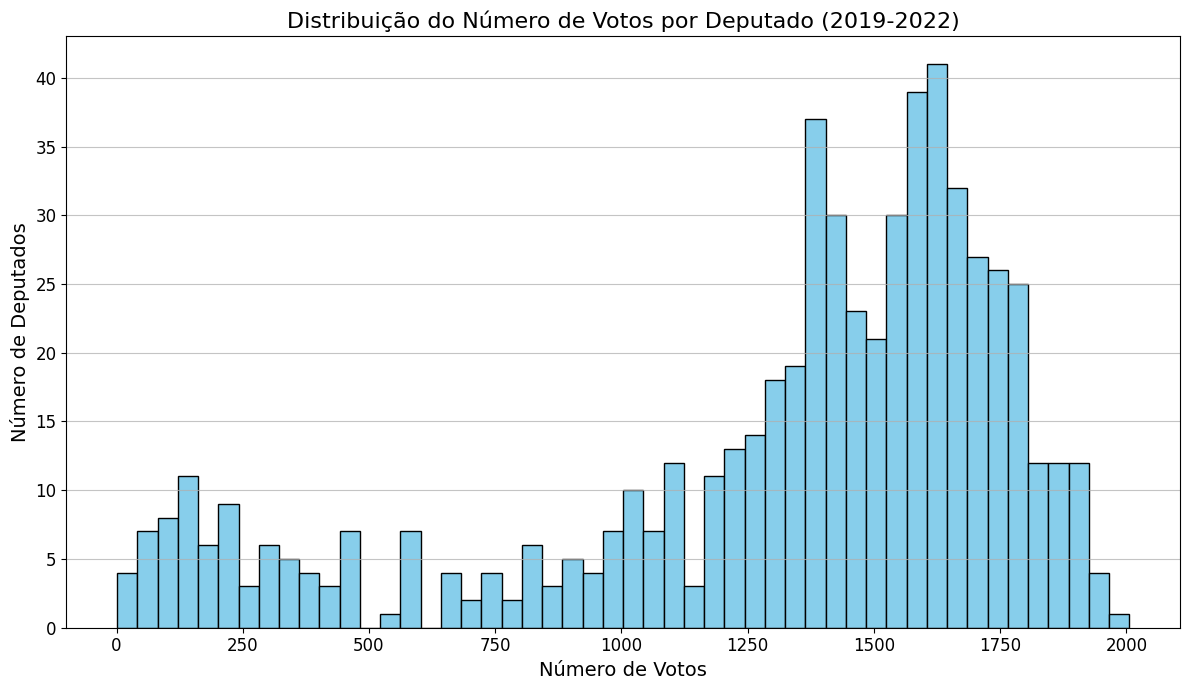

Histograma salvo em 'Imagens/histograma_votos_deputados.png'


In [7]:
# === 1️⃣ Carregar e concatenar os dados de votação ===
print("Carregando e processando dados de votação...")
anos = [2019, 2020, 2021, 2022]
dfs = []
for ano in anos:
    df = pd.read_csv(f"votacoesVotos/votacoesVotos-{ano}.csv", sep=";", dtype=str)
    dfs.append(df)
dados_completos = pd.concat(dfs, ignore_index=True)

# === 2️⃣ Contar votos por deputado ===
# Certificar que 'voto' e 'deputado_id' são strings e tratar valores ausentes
dados_completos["voto"] = dados_completos["voto"].astype(str).str.strip().str.lower()
dados_completos["deputado_id"] = dados_completos["deputado_id"].astype(str)

# Filtrar votos válidos (ex: 'sim', 'não', 'nao') e ignorar 'abstenção', 'obstrução', etc.
votos_validos = dados_completos[dados_completos["voto"].isin(["sim", "não", "nao"])]

# Contar o número de votos para cada deputado
contagem_votos_deputados = votos_validos["deputado_id"].value_counts()

print(f"Total de deputados com votos registrados: {len(contagem_votos_deputados)}")
print(f"Total de votos válidos processados: {contagem_votos_deputados.sum()}")

# === 3️⃣ Gerar o histograma ===
plt.figure(figsize=(12, 7))
plt.hist(contagem_votos_deputados, bins=50, color="skyblue", edgecolor="black")

plt.title("Distribuição do Número de Votos por Deputado (2019-2022)", fontsize=16)
plt.xlabel("Número de Votos", fontsize=14)
plt.ylabel("Número de Deputados", fontsize=14)
plt.grid(axis="y", alpha=0.75)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# === 4️⃣ Salvar e mostrar o gráfico ===
output_path = "Imagens/histograma_votos_deputados.png"
os.makedirs(os.path.dirname(output_path), exist_ok=True)
plt.savefig(output_path, dpi=300)
plt.show()

print(f"Histograma salvo em '{output_path}'")

# Filtrando deputados com poucos votos

In [24]:
deputados_filtrados = contagem_votos_deputados[
    (contagem_votos_deputados >= 1000) #& (contagem_votos_deputados <= 1200)
]

# Desenhar Grafo

In [ ]:
# === 2️⃣ CARREGAR E CONCATENAR OS DADOS ===
arquivos = [
    "votacoesVotos/votacoesVotos-2019.csv",
    "votacoesVotos/votacoesVotos-2020.csv",
    "votacoesVotos/votacoesVotos-2021.csv",
    "votacoesVotos/votacoesVotos-2022.csv"
]

dfs = []
for arquivo in arquivos:
    df = pd.read_csv(arquivo, sep=';', quotechar='"')
    dfs.append(df)

dados = pd.concat(dfs, ignore_index=True)

# Filtra apenas as votações com mais de 250 votos
dados = dados[dados["idVotacao"].isin(acima_250)]

# Filtra apenas os deputados que estão no filtro
dados["deputado_id"] = dados["deputado_id"].astype(str)
dados = dados[dados["deputado_id"].isin(deputados_filtrados.index)]

# Normaliza os votos
dados["voto"] = dados["voto"].astype(str).str.strip().str.lower()

# === 3️⃣ CATEGORIZA O VOTO ===
def classificar_voto(v):
    if v == "sim":
        return "sim"
    elif v in ["não", "nao"]:
        return "não"
    else:
        return "outro"

dados["categoria_voto"] = dados["voto"].apply(classificar_voto)

# === 4️⃣ CRIA O GRAFO COMPLETO ===
G = nx.Graph()

for _, row in dados.iterrows():
    votacao_node = f"votacao_{row['idVotacao']}"
    deputado_node = f"deputado_{row['deputado_id']}"
    voto_valor = row["categoria_voto"]
    
    # Adiciona nós com atributos
    G.add_node(votacao_node, tipo="votacao")
    G.add_node(
        deputado_node,
        tipo="deputado",
        nome=row["deputado_nome"],
        partido=row["deputado_siglaPartido"],
        uf=row["deputado_siglaUf"]
    )
    
    # Adiciona a aresta com o tipo de voto
    G.add_edge(votacao_node, deputado_node, voto=voto_valor)

# === 5️⃣ SALVA O GRAFO ===
nx.write_graphml(G, "votacoes_completas_acima_250.graphml")

print(f"Grafo completo criado com {G.number_of_nodes()} nós e {G.number_of_edges()} arestas.")
print("Arquivo salvo como 'votacoes_completas_acima_250.graphml'.")

Grafo completo criado com 2568 nós e 790525 arestas.
Arquivo salvo como 'votacoes_completas_acima_250.graphml'.


In [29]:
# === 1️⃣ CONTAGEM DE VOTOS POR idVotacao ===
anos = [2019, 2020, 2021, 2022]
contagens = Counter()

for ano in anos:
    df = pd.read_csv(f"votacoesVotos/votacoesVotos-{ano}.csv", sep=";")
    freq = df["idVotacao"].value_counts()
    contagens.update(freq.to_dict())

# Filtra votações com mais de 250 votos
acima_250 = [id_v for id_v, count in contagens.items() if count >= 250]
print(f"{len(acima_250)} votações com mais de 250 votos identificadas.")

# === 2️⃣ CARREGAR E CONCATENAR OS DADOS ===
arquivos = [
    "votacoesVotos/votacoesVotos-2019.csv",
    "votacoesVotos/votacoesVotos-2020.csv",
    "votacoesVotos/votacoesVotos-2021.csv",
    "votacoesVotos/votacoesVotos-2022.csv"
]

dfs = [pd.read_csv(arquivo, sep=';', quotechar='"') for arquivo in arquivos]
dados = pd.concat(dfs, ignore_index=True)
dados = dados[dados["idVotacao"].isin(acima_250)]
dados["voto"] = dados["voto"].astype(str).str.strip().str.lower()
dados["deputado_id"] = dados["deputado_id"].astype(str)

# Filtrar apenas os deputados mais participativos
dados = dados[dados["deputado_id"].isin(deputados_filtrados.index)]


# === 3️⃣ CATEGORIZA O VOTO ===
def classificar_voto(v):
    if v == "sim":
        return "sim"
    elif v in ["não", "nao"]:
        return "não"
    else:
        return "outro"

dados["categoria_voto"] = dados["voto"].apply(classificar_voto)

# === 4️⃣ COR DAS ARESTAS ===
def cor_aresta(v):
    if v == "sim":
        return "#00FF00"  # verde
    elif v == "não":
        return "#FF0000"  # vermelho
    else:
        return "#808080"  # cinza

dados["cor_aresta"] = dados["categoria_voto"].apply(cor_aresta)

# === 5️⃣ CRIA O GRAFO BIPARTITE ===
G = nx.Graph()

for _, row in dados.iterrows():
    votacao_node = f"votacao_{row['idVotacao']}"
    deputado_node = f"deputado_{row['deputado_id']}"
    
    # Nó votacao (bipartite=0)
    G.add_node(votacao_node, tipo="votacao", bipartite=0)
    
    # Nó deputado (bipartite=1)
    G.add_node(
        deputado_node,
        tipo="deputado",
        bipartite=1,
        nome=row["deputado_nome"],
        partido=row["deputado_siglaPartido"],
        uf=row["deputado_siglaUf"]
    )
    
    # Aresta com atributo voto e cor
    G.add_edge(votacao_node, deputado_node, voto=row["categoria_voto"], cor=row["cor_aresta"])

# === 6️⃣ SALVA O GRAFO ===
nx.write_graphml(G, "votacoes_bipartite_colorida_acima_250.graphml")

print(f"Grafo bipartite colorido criado com {G.number_of_nodes()} nós e {G.number_of_edges()} arestas.")
print("Arquivo salvo como 'votacoes_bipartite_colorida_acima_250.graphml'.")


1971 votações com mais de 250 votos identificadas.
Grafo bipartite colorido criado com 2450 nós e 736585 arestas.
Arquivo salvo como 'votacoes_bipartite_colorida_acima_250.graphml'.
Grafo bipartite colorido criado com 2450 nós e 736585 arestas.
Arquivo salvo como 'votacoes_bipartite_colorida_acima_250.graphml'.


# Visualizar grafo

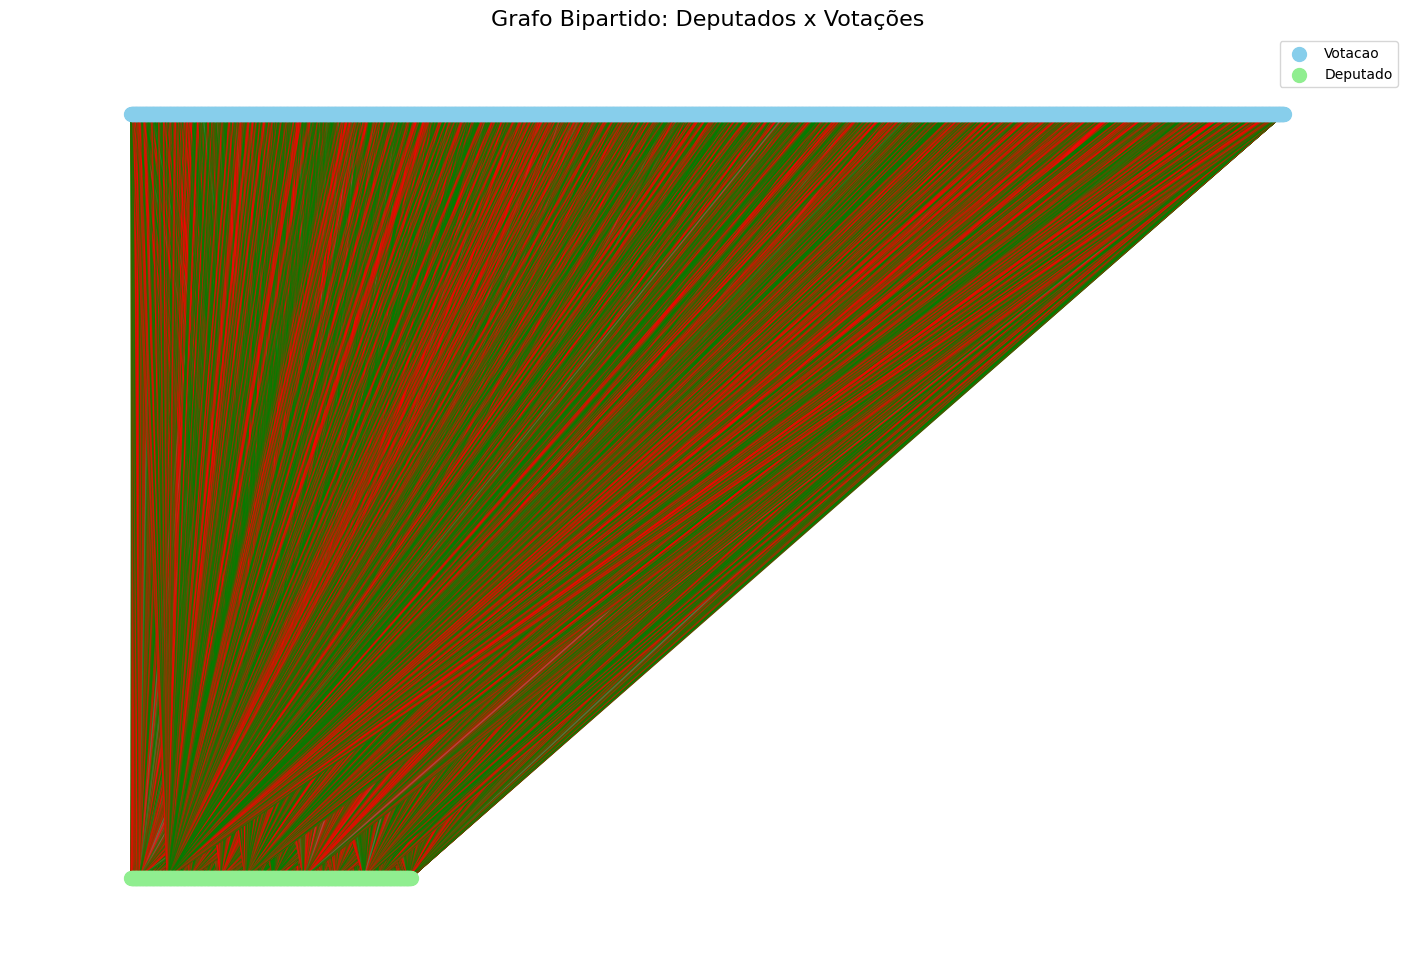

In [30]:
# === Load the graph ===
G = nx.read_graphml("votacoes_bipartite_colorida_acima_250.graphml")

# Separate the two node sets by the 'bipartite' attribute
votacao_nodes = {n for n, d in G.nodes(data=True) if int(d.get("bipartite", 0)) == 0}
deputado_nodes = set(G) - votacao_nodes

# === Compute positions for bipartite layout ===
pos = dict()
# Votacoes on the top
pos.update((n, (i, 1)) for i, n in enumerate(votacao_nodes))
# Deputados on the bottom
pos.update((n, (i, 0)) for i, n in enumerate(deputado_nodes))

# === Draw the nodes ===
plt.figure(figsize=(18, 12))

# Draw nodes
nx.draw_networkx_nodes(G, pos, nodelist=votacao_nodes, node_color='skyblue', node_size=100, label='Votacao')
nx.draw_networkx_nodes(G, pos, nodelist=deputado_nodes, node_color='lightgreen', node_size=100, label='Deputado')

# Draw edges with colors by 'voto'
edge_colors = []
for u, v, d in G.edges(data=True):
    voto = d.get("voto", "outro")
    if voto == "sim":
        edge_colors.append("green")
    elif voto == "não":
        edge_colors.append("red")
    else:
        edge_colors.append("gray")

nx.draw_networkx_edges(G, pos, edge_color=edge_colors, alpha=0.5)

plt.axis('off')
plt.legend(scatterpoints=1)
plt.title("Grafo Bipartido: Deputados x Votações", fontsize=16)
plt.show()


In [ ]:
# === Carrega o grafo ===
G = nx.read_graphml("votacoes_bipartite_colorida_acima_250.graphml")

# === Separa os conjuntos bipartidos ===
votacao_nodes = [n for n, d in G.nodes(data=True) if int(d.get("bipartite", 0)) == 0]
deputado_nodes = [n for n in G if n not in votacao_nodes]

# === Seleciona 5% de cada conjunto ===
sample_frac = 0.05
num_votacoes_sample = max(1, int(len(votacao_nodes) * sample_frac))
num_deputados_sample = max(1, int(len(deputado_nodes) * sample_frac))

sample_votacoes = random.sample(votacao_nodes, num_votacoes_sample)
sample_deputados = random.sample(deputado_nodes, num_deputados_sample)

# === Cria subgrafo apenas com os nós selecionados e suas arestas ===
sub_nodes = set(sample_votacoes + sample_deputados)
G_sub = G.subgraph(sub_nodes).copy()

print(f"Grafo original: {len(G)} nós, {len(G.edges())} arestas")
print(f"Grafo reduzido: {len(G_sub)} nós, {len(G_sub.edges())} arestas")

# === Calcula posições com espaçamento proporcional ===
votacao_nodes_sub = [n for n in G_sub if n in sample_votacoes]
deputado_nodes_sub = [n for n in G_sub if n in sample_deputados]

num_votacoes = len(votacao_nodes_sub)
num_deputados = len(deputado_nodes_sub)

votacao_x = np.linspace(0, num_votacoes, num_votacoes)
deputado_x = np.linspace(0, num_votacoes, num_deputados)

pos = dict()
pos.update({n: (x, 1) for n, x in zip(votacao_nodes_sub, votacao_x)})
pos.update({n: (x, 0) for n, x in zip(deputado_nodes_sub, deputado_x)})




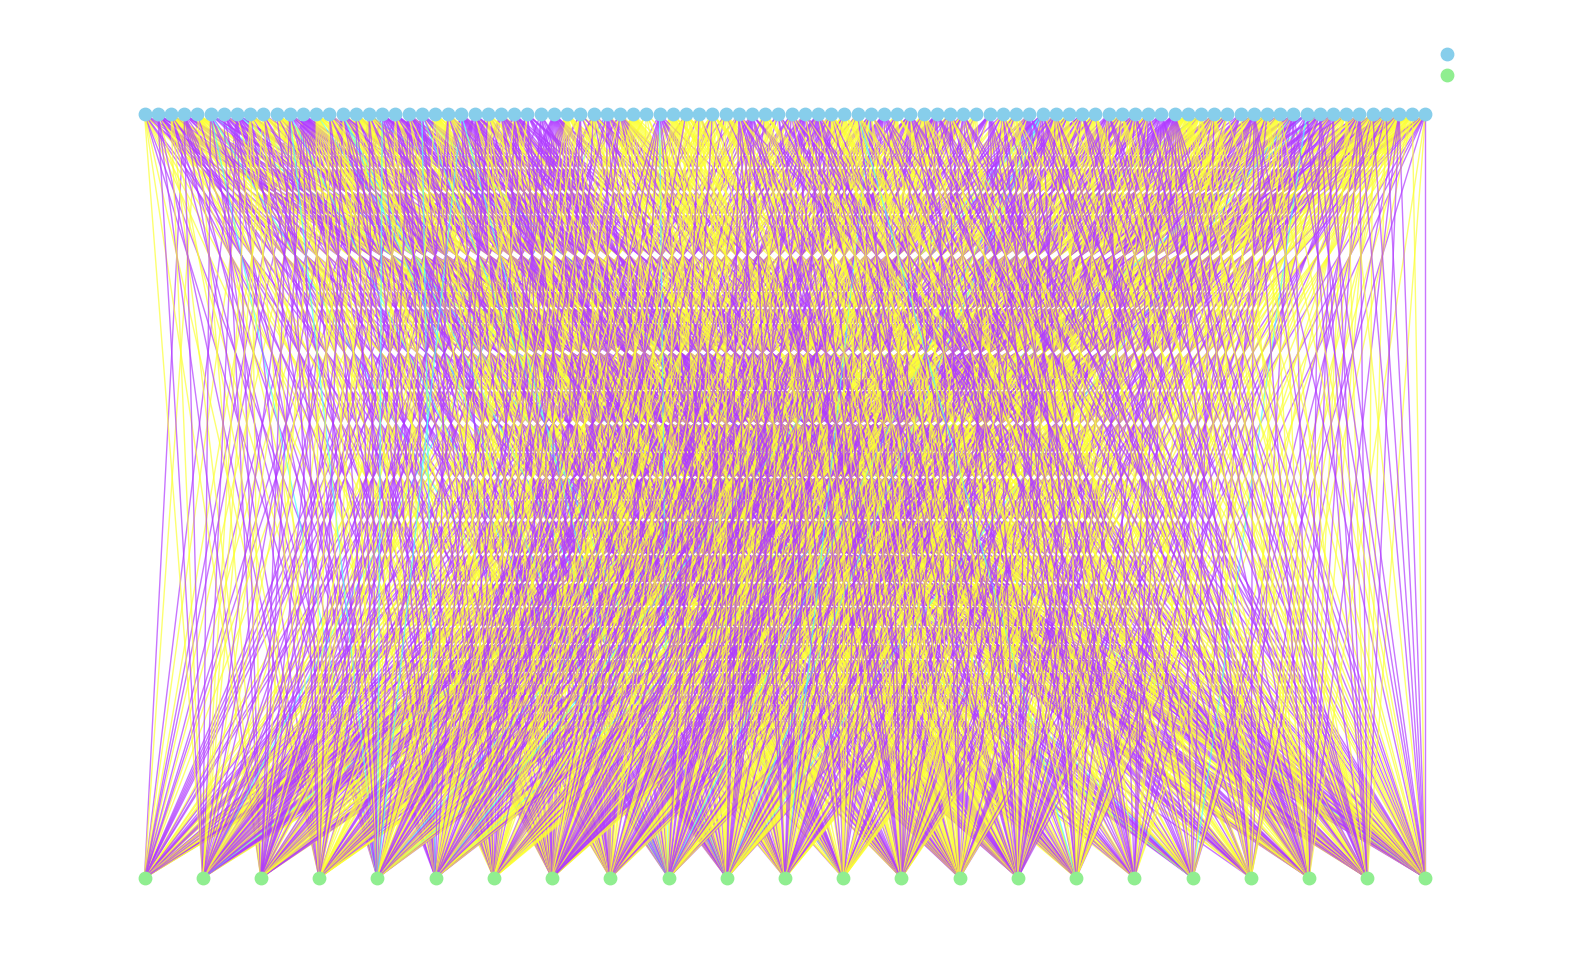

In [40]:
plt.figure(figsize=(20, 12)) # Define o fundo da figura como transparente

nx.draw_networkx_nodes(G_sub, pos, nodelist=votacao_nodes_sub, node_color='skyblue', node_size=80, label='Proposição')
nx.draw_networkx_nodes(G_sub, pos, nodelist=deputado_nodes_sub, node_color='lightgreen', node_size=80, label='Deputado')

# === Define cores das arestas por voto ===
edge_colors = []
for u, v, d in G_sub.edges(data=True):
    voto = d.get("voto", "outro")
    if voto == "sim":
        edge_colors.append("#FCFF32")  # Verde Neon para Sim
    elif voto == "não":
        edge_colors.append("#B03AFF")  # Vermelho Alaranjado para Não
    else:
        edge_colors.append("#49FFFF")  # Ciano para Outro (destaca bem em fundo escuro)

nx.draw_networkx_edges(G_sub, pos, edge_color=edge_colors, alpha=0.7) # Aumenta a opacidade das arestas

plt.axis('off')
plt.legend(scatterpoints=1, facecolor='none', edgecolor='none', labelcolor='white') # Legenda transparente e texto branco
plt.title("Amostra (5%) do Grafo Bipartido: Deputados x Votações", fontsize=16, color='white') # Título em branco

plt.savefig("grafo_bipartido_amostra_5.pdf", transparent=True) # Salva com fundo transparente
plt.show()

# Distribuição de Graus

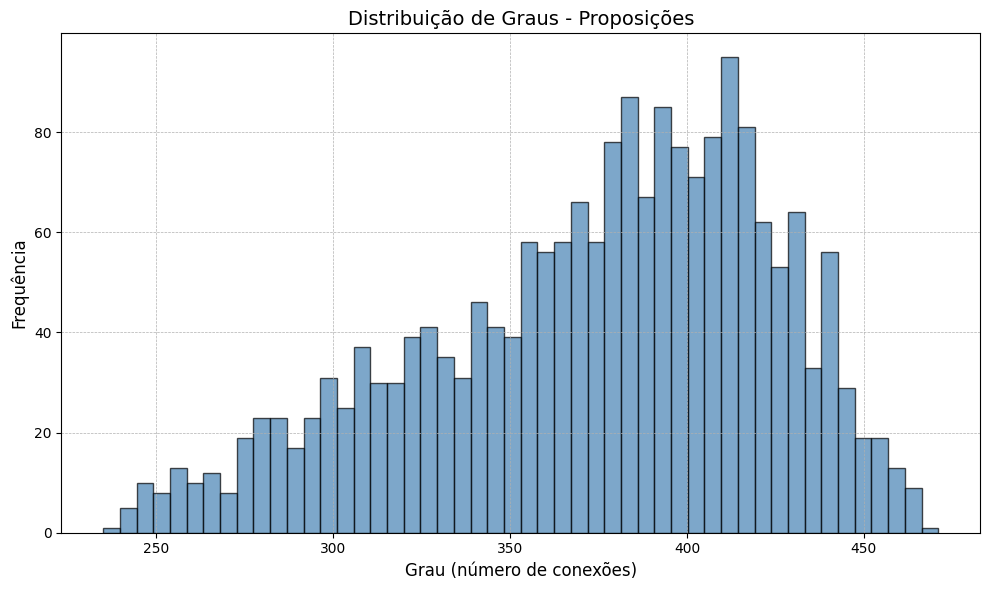

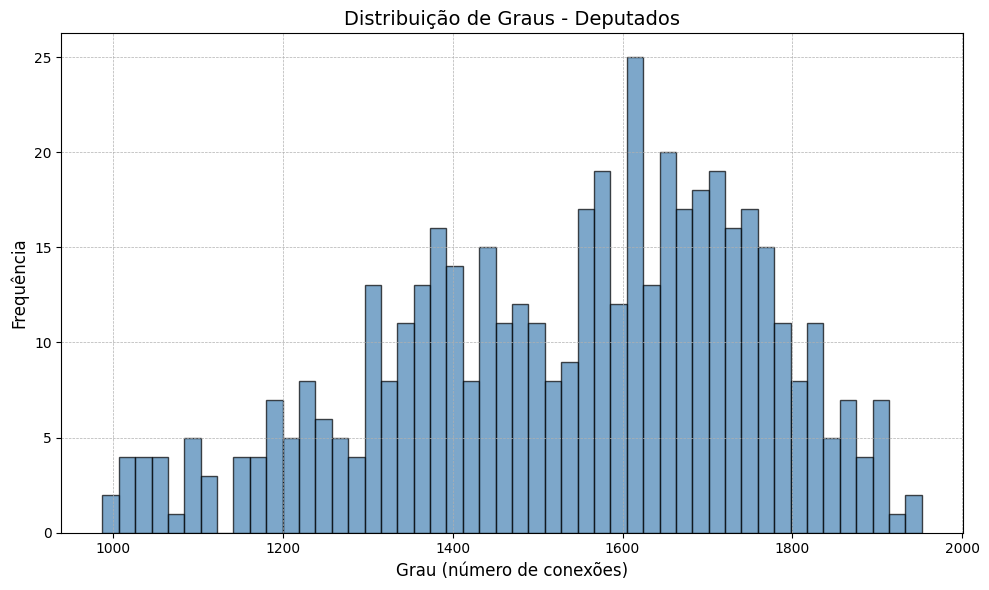

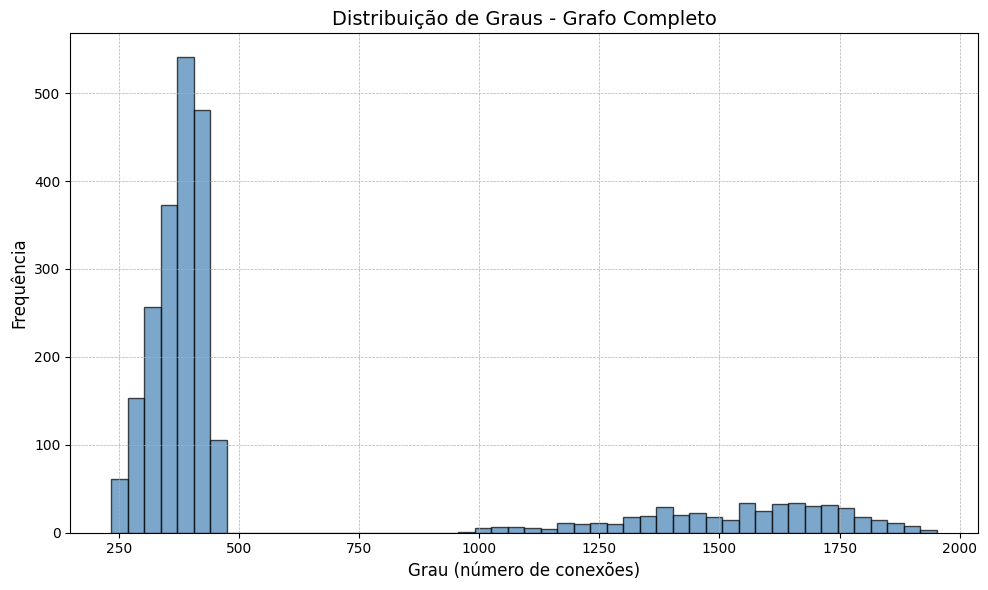

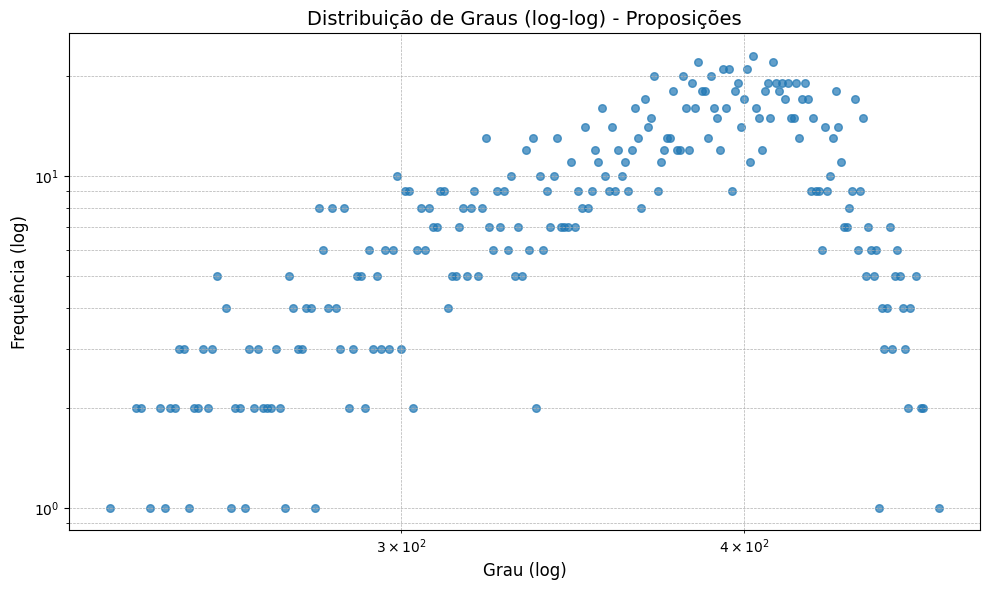

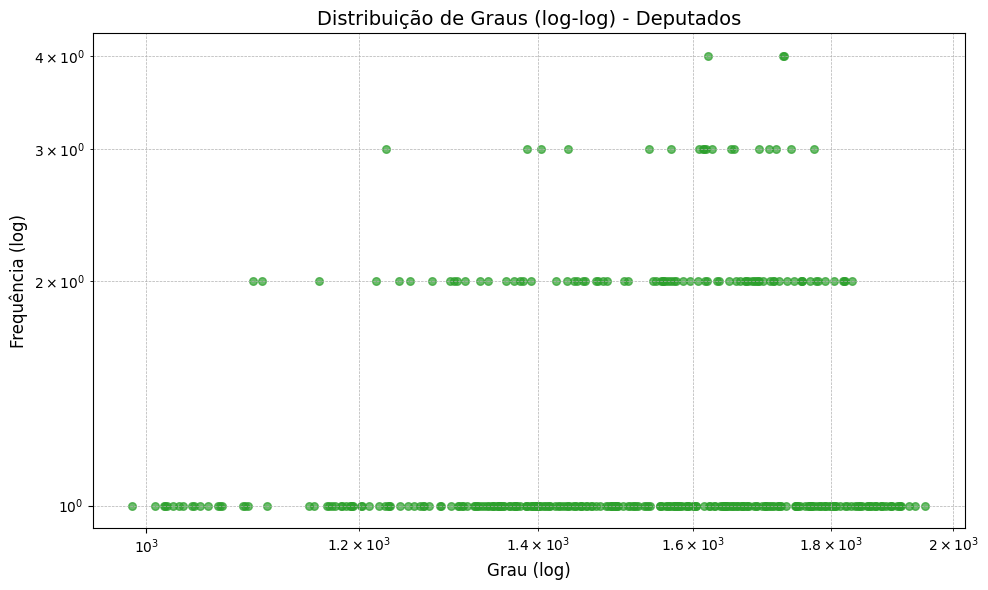

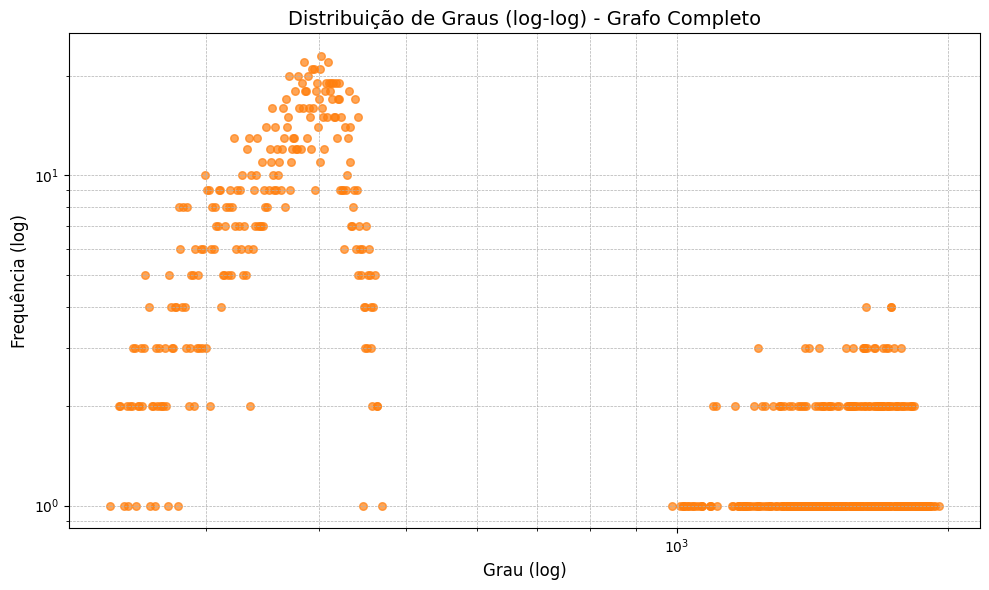

In [42]:
# --- Calcula os graus ---
graus_votacoes = [G.degree(n) for n in votacao_nodes]
graus_deputados = [G.degree(n) for n in deputado_nodes]
graus_completo = [G.degree(n) for n in G.nodes()]

# --- Função auxiliar para histogramas ---
def plot_degree_histogram(data, title, filename):
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
    plt.xlabel('Grau (número de conexões)', fontsize=12)
    plt.ylabel('Frequência', fontsize=12)
    plt.title(title, fontsize=14)
    plt.grid(True, ls="--", lw=0.5)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

# --- Função auxiliar para log-log em pontos ---
def plot_loglog_points(data, title, filename, color='darkred'):
    values, counts = np.unique(data, return_counts=True)
    plt.figure(figsize=(10, 6))
    plt.scatter(values, counts, s=30, color=color, alpha=0.7)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Grau (log)', fontsize=12)
    plt.ylabel('Frequência (log)', fontsize=12)
    plt.title(title, fontsize=14)
    plt.grid(True, which="both", ls="--", lw=0.5)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

# === Histogramas normais ===
plot_degree_histogram(graus_votacoes, 
                      "Distribuição de Graus - Proposições", 
                      "grau_votacoes.pdf")

plot_degree_histogram(graus_deputados, 
                      "Distribuição de Graus - Deputados", 
                      "grau_deputados.pdf")

plot_degree_histogram(graus_completo, 
                      "Distribuição de Graus - Grafo Completo", 
                      "grau_completo.pdf")

# === Gráficos log-log ===
plot_loglog_points(graus_votacoes, 
                   "Distribuição de Graus (log-log) - Proposições", 
                   "grau_votacoes_loglog.pdf",
                   color='tab:blue')

plot_loglog_points(graus_deputados, 
                   "Distribuição de Graus (log-log) - Deputados", 
                   "grau_deputados_loglog.pdf",
                   color='tab:green')

plot_loglog_points(graus_completo, 
                   "Distribuição de Graus (log-log) - Grafo Completo", 
                   "grau_completo_loglog.pdf",
                   color='tab:orange')


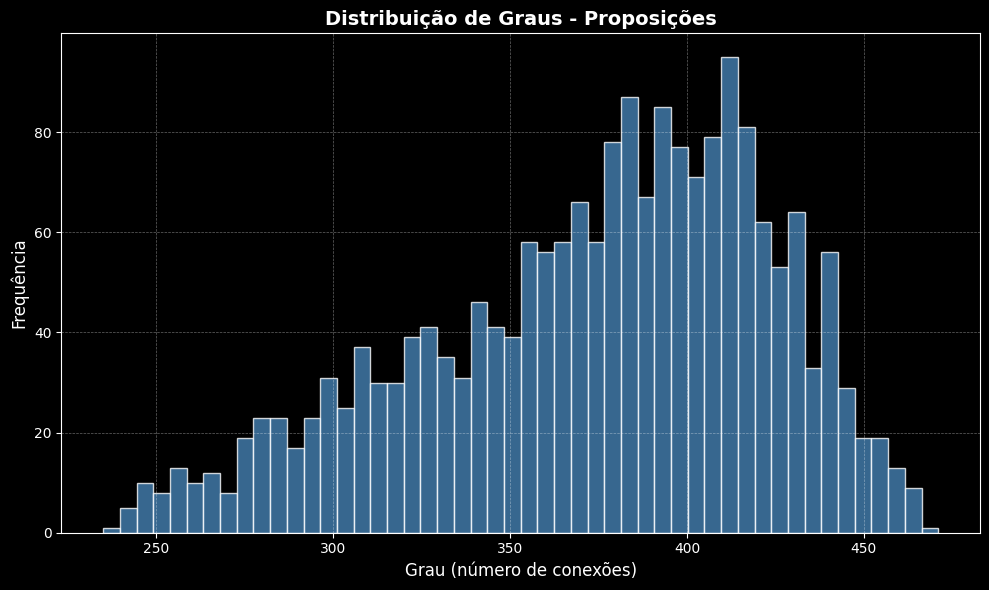

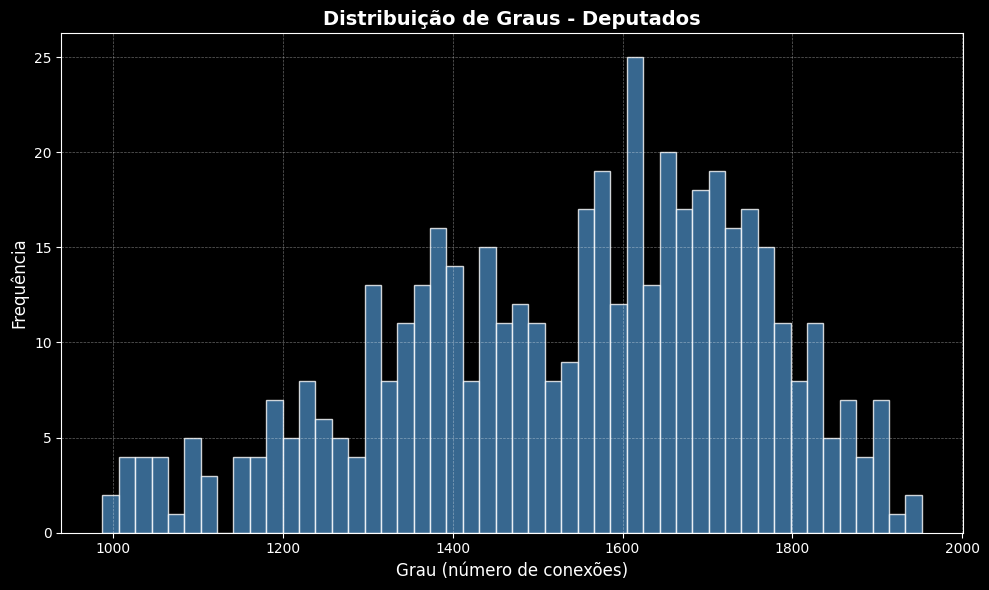

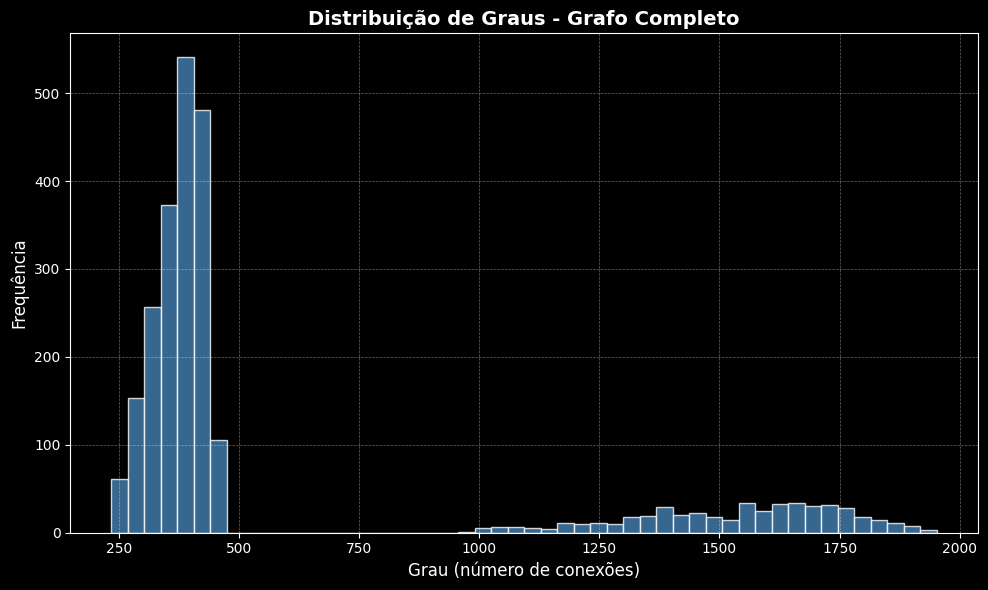

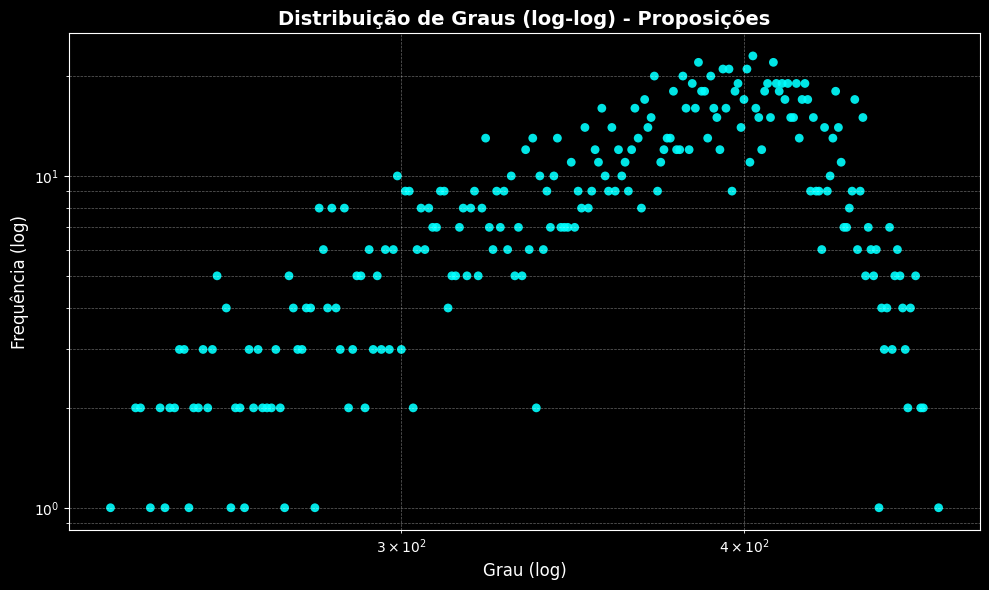

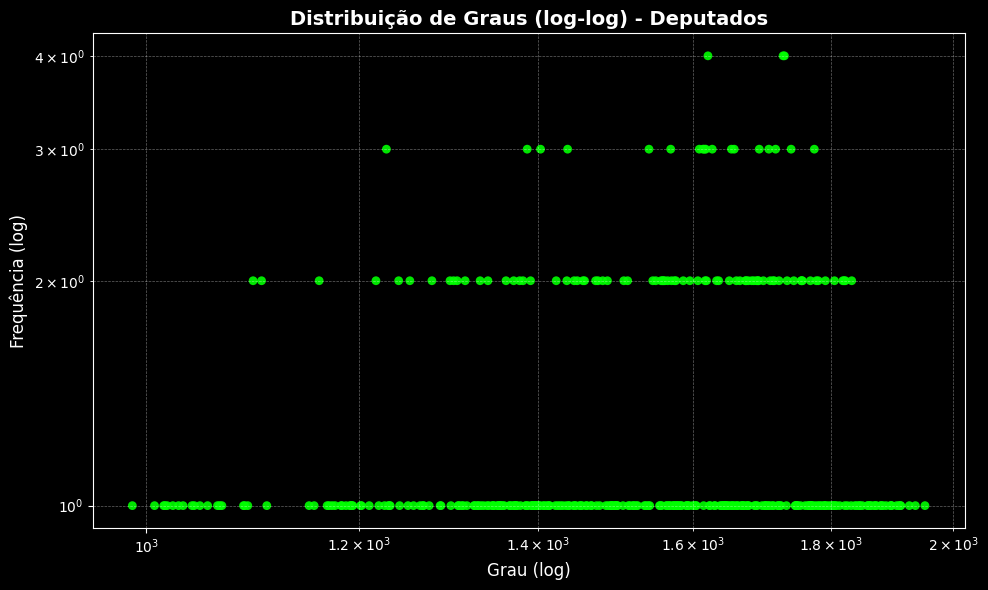

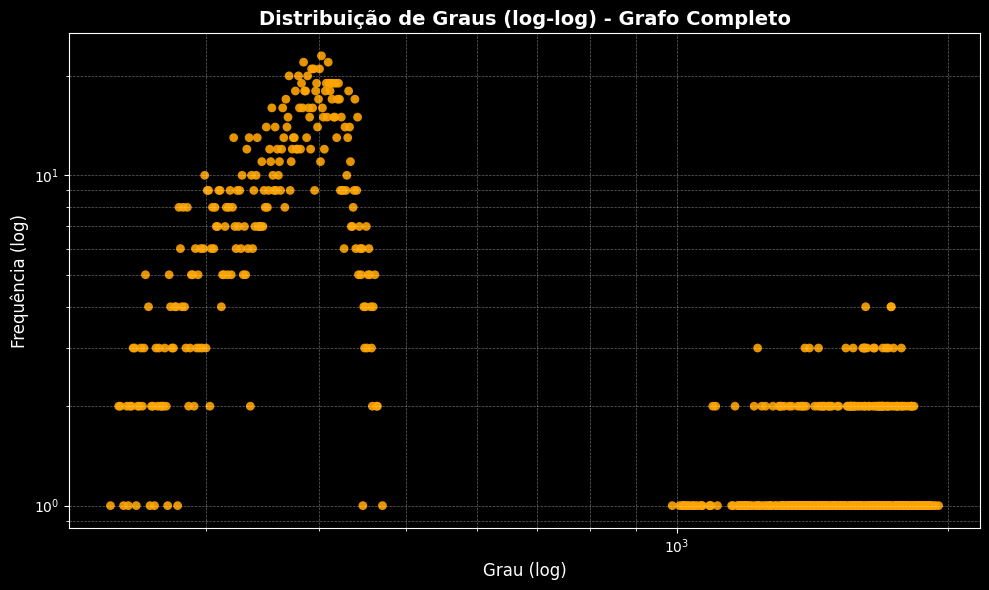

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Configura o estilo global para fundo escuro (textos e eixos brancos)
plt.style.use('dark_background')

# --- Calcula os graus (mantido igual) ---
# Nota: Assumindo que G, votacao_nodes e deputado_nodes já existem no seu contexto
graus_votacoes = [G.degree(n) for n in votacao_nodes]
graus_deputados = [G.degree(n) for n in deputado_nodes]
graus_completo = [G.degree(n) for n in G.nodes()]

# --- Função auxiliar para histogramas ---
def plot_degree_histogram(data, title, filename):
    plt.figure(figsize=(10, 6))
    
    # Alterei edgecolor para 'white' para destacar as barras no fundo escuro
    # Aumentei um pouco o alpha para 0.8 para as cores ficarem mais vibrantes
    plt.hist(data, bins=50, color='steelblue', edgecolor='white', alpha=0.8)
    
    plt.xlabel('Grau (número de conexões)', fontsize=12, color='white')
    plt.ylabel('Frequência', fontsize=12, color='white')
    plt.title(title, fontsize=14, color='white', fontweight='bold')
    
    # Grid mais sutil e claro
    plt.grid(True, ls="--", lw=0.5, alpha=0.4)
    plt.tight_layout()
    
    # 2. Salva com fundo transparente
    plt.savefig(filename, transparent=True, dpi=300)
    plt.show()

# --- Função auxiliar para log-log em pontos ---
def plot_loglog_points(data, title, filename, color='salmon'): # Mudei default para salmon (visível no preto)
    values, counts = np.unique(data, return_counts=True)
    plt.figure(figsize=(10, 6))
    
    # Aumentei o tamanho do ponto (s=40) e alpha para melhor visibilidade
    plt.scatter(values, counts, s=40, color=color, alpha=0.9, edgecolors='none')
    
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Grau (log)', fontsize=12, color='white')
    plt.ylabel('Frequência (log)', fontsize=12, color='white')
    plt.title(title, fontsize=14, color='white', fontweight='bold')
    
    plt.grid(True, which="both", ls="--", lw=0.5, alpha=0.4)
    plt.tight_layout()
    
    # 2. Salva com fundo transparente
    plt.savefig(filename, transparent=True, dpi=300)
    plt.show()

# === Histogramas normais ===
plot_degree_histogram(graus_votacoes, 
                      "Distribuição de Graus - Proposições", 
                      "grau_votacoes.png") # Recomendo PNG para transparência em slides, PDF as vezes dá conflito

plot_degree_histogram(graus_deputados, 
                      "Distribuição de Graus - Deputados", 
                      "grau_deputados.png")

plot_degree_histogram(graus_completo, 
                      "Distribuição de Graus - Grafo Completo", 
                      "grau_completo.png")

# === Gráficos log-log ===
# Cores ajustadas para "brilhar" no fundo preto (cores 'tab:' geralmente funcionam bem)
plot_loglog_points(graus_votacoes, 
                   "Distribuição de Graus (log-log) - Proposições", 
                   "grau_votacoes_loglog.png",
                   color='cyan') # Cyan destaca muito bem no preto

plot_loglog_points(graus_deputados, 
                   "Distribuição de Graus (log-log) - Deputados", 
                   "grau_deputados_loglog.png",
                   color='lime') # Lime destaca muito bem no preto

plot_loglog_points(graus_completo, 
                   "Distribuição de Graus (log-log) - Grafo Completo", 
                   "grau_completo_loglog.png",
                   color='orange')

# Detecção de comunidades

Grafo original: 2568 nós, 790525 arestas
Deputados: 597, Votações: 1971
Grafo projetado de deputados: 597 nós, 175081 arestas

📊 Estatísticas dos pesos das arestas:
 - Peso máximo: 1917
 - Peso mínimo: 1
 - Peso médio:  919.13


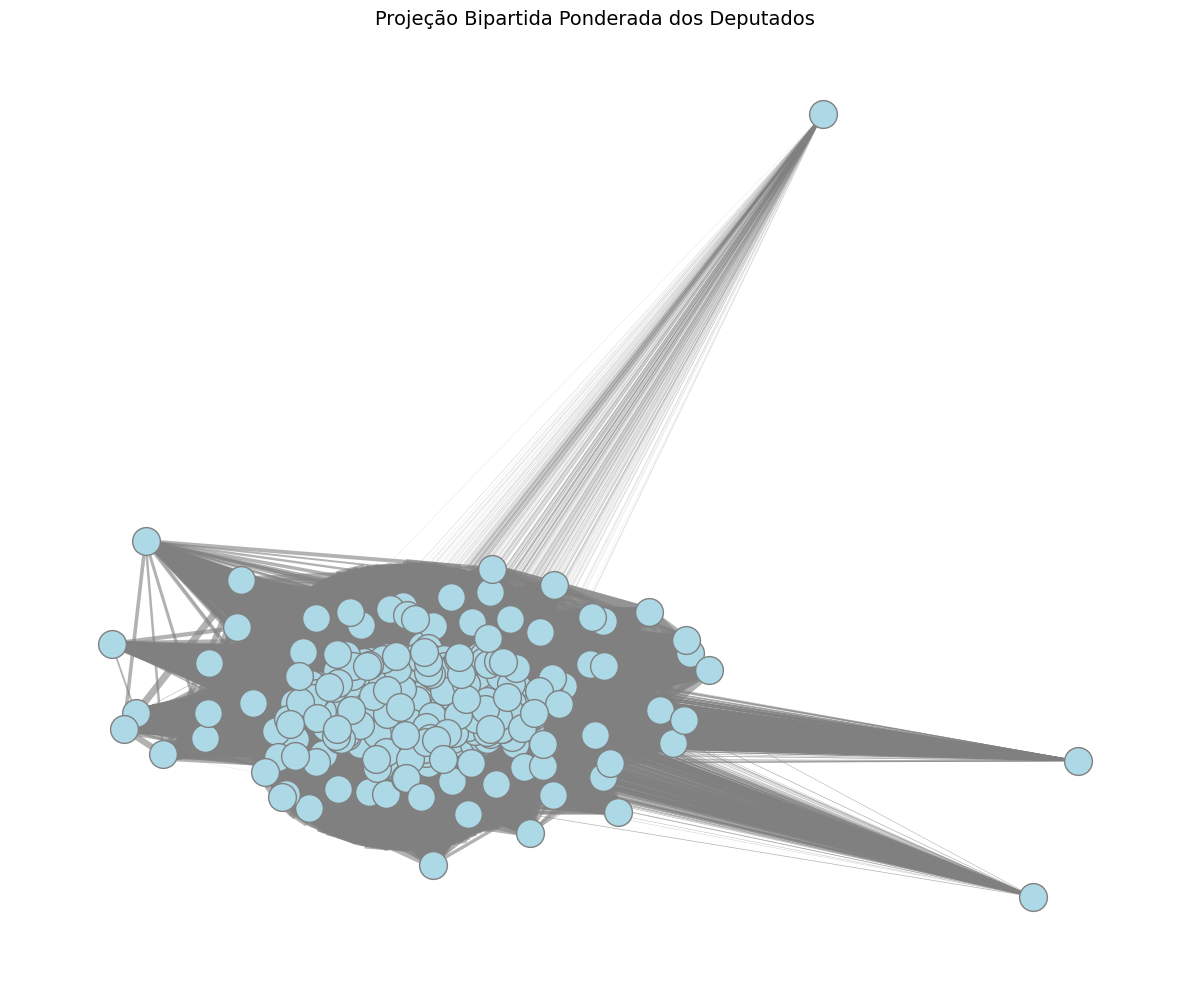


✅ Grafo projetado ponderado salvo como 'grafo_deputados_projetado.graphml'


In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# === 1️⃣ Carrega o grafo bipartido ===
G = nx.read_graphml("Grafos/votacoes_bipartite_colorida_acima_250.graphml")

# === 2️⃣ Identifica conjuntos bipartidos ===
votacao_nodes = [n for n, d in G.nodes(data=True) if int(d.get("bipartite", 0)) == 0]
deputado_nodes = [n for n in G if n not in votacao_nodes]

print(f"Grafo original: {len(G)} nós, {len(G.edges())} arestas")
print(f"Deputados: {len(deputado_nodes)}, Votações: {len(votacao_nodes)}")

# === 3️⃣ Cria projeção ponderada entre deputados ===
G_deputados = nx.bipartite.weighted_projected_graph(G, deputado_nodes)
print(f"Grafo projetado de deputados: {len(G_deputados)} nós, {len(G_deputados.edges())} arestas")

# === 4️⃣ Estatísticas dos pesos das arestas ===
pesos = [d["weight"] for _, _, d in G_deputados.edges(data=True)]
peso_max = max(pesos) if pesos else 0
peso_min = min(pesos) if pesos else 0
peso_medio = np.mean(pesos) if pesos else 0

print("\n📊 Estatísticas dos pesos das arestas:")
print(f" - Peso máximo: {peso_max}")
print(f" - Peso mínimo: {peso_min}")
print(f" - Peso médio:  {peso_medio:.2f}")

# === 5️⃣ Visualização do grafo ===
plt.figure(figsize=(12, 10))

# Layout para melhor visualização (spring layout funciona bem)
pos = nx.spring_layout(G_deputados, k=0.3, seed=42)

# Nós e arestas com espessura proporcional ao peso
edges = G_deputados.edges(data=True)
weights = [d["weight"] for _, _, d in edges]
nx.draw_networkx_nodes(G_deputados, pos, node_size=400, node_color="lightblue", edgecolors="gray")

# Arestas com espessura proporcional ao peso
nx.draw_networkx_edges(
    G_deputados, pos,
    width=[w * 0.1 for w in weights],
    edge_color="gray", alpha=0.6
)


plt.title("Projeção Bipartida Ponderada dos Deputados", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()

# === 6️⃣ Salva o grafo projetado ===
nx.write_graphml(G_deputados, "grafo_deputados_projetado.graphml")
print("\n✅ Grafo projetado ponderado salvo como 'grafo_deputados_projetado.graphml'")


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# === 1️⃣ Carrega o grafo bipartido ===
G = nx.read_graphml("Grafos/votacoes_bipartite_colorida_acima_250.graphml")

# === 2️⃣ Identifica conjuntos bipartidos ===
votacao_nodes = [n for n, d in G.nodes(data=True) if int(d.get("bipartite", 0)) == 0]
deputado_nodes = [n for n in G if n not in votacao_nodes]

print(f"Grafo original: {len(G)} nós, {len(G.edges())} arestas")
print(f"Deputados: {len(deputado_nodes)}, Votações: {len(votacao_nodes)}")

print

# === 3️⃣ Cria projeção ponderada baseada em voto igual (sim-sim ou não-não) ===
G_deputados = nx.Graph()

for i, dep1 in enumerate(deputado_nodes):
    for dep2 in deputado_nodes[i+1:]:
        
        peso = 0

        # Proposições votadas por ambos
        props1 = set(G.neighbors(dep1))
        props2 = set(G.neighbors(dep2))
        print(props1)
        print(props2)
        comuns = props1 & props2

        for p in comuns:
            voto1 = G.edges[dep1, p].get("d5", None)  # "sim" ou "não"
            voto2 = G.edges[dep2, p].get("d5", None)

            if voto1 and voto2 and voto1 == voto2:
                peso += 1

        if peso > 0:
            G_deputados.add_edge(dep1, dep2, weight=peso)

# print(f"\nGrafo projetado de deputados: {len(G_deputados)} nós, {len(G_deputados.edges())} arestas")


# # === 4️⃣ Estatísticas dos pesos das arestas ===
# pesos = [d["weight"] for _, _, d in G_deputados.edges(data=True)]
# peso_max = max(pesos) if pesos else 0
# peso_min = min(pesos) if pesos else 0
# peso_medio = np.mean(pesos) if pesos else 0

# print("\n📊 Estatísticas dos pesos das arestas (votos iguais):")
# print(f" - Peso máximo: {peso_max}")
# print(f" - Peso mínimo: {peso_min}")
# print(f" - Peso médio:  {peso_medio:.2f}")


# # === 5️⃣ Visualização do grafo projetado ===
# plt.figure(figsize=(12, 10))

# # Layout (spring layout funciona bem para redes densas)
# pos = nx.spring_layout(G_deputados, k=0.35, seed=42)

# # Nós
# nx.draw_networkx_nodes(
#     G_deputados, pos,
#     node_size=300,
#     node_color="lightblue",
#     edgecolors="black"
# )

# # Arestas com espessura proporcional ao peso
# weights = [d["weight"] for _, _, d in G_deputados.edges(data=True)]
# nx.draw_networkx_edges(
#     G_deputados, pos,
#     width=[w * 0.10 for w in weights],
#     edge_color="gray",
#     alpha=0.7
# )

# # Rótulos opcionais
# # nx.draw_networkx_labels(G_deputados, pos, font_size=7)

# plt.title("Projeção Bipartida Ponderada dos Deputados (Votos Iguais)", fontsize=14)
# plt.axis("off")
# plt.tight_layout()
# plt.show()


# # === 6️⃣ Salva o grafo projetado ===
# nx.write_graphml(G_deputados, "grafo_deputados_projetado_same_vote.graphml")
# print("\n✅ Grafo projetado salvo como 'grafo_deputados_projetado_same_vote.graphml'")


In [1]:
import networkx as nx
from collections import defaultdict

# === 1️⃣ Carrega o grafo bipartido ===
G = nx.read_graphml("Grafos\\votacoes_bipartite_colorida_acima_250.graphml")
print(f"Grafo carregado: {len(G)} nós, {len(G.edges())} arestas")

# === 2️⃣ Identifica os dois conjuntos bipartidos ===
deputados = [n for n, d in G.nodes(data=True) if d.get("tipo") == "deputado"]
votacoes = [n for n, d in G.nodes(data=True) if d.get("tipo") == "votacao"]

print(f"Deputados: {len(deputados)}")
print(f"Votações: {len(votacoes)}")

# === 3️⃣ Para cada votação, agrupa deputados que votaram "sim" e "não" ===
votacao_para_deps = defaultdict(lambda: {"sim": [], "não": []})

for dep, vot in G.edges():
    # Como o grafo é não direcionado, detectar quem é deputado e quem é votação
    node_dep = dep if G.nodes[dep].get("tipo") == "deputado" else vot
    node_vot = vot if node_dep == dep else dep

    voto = G.edges[dep, vot].get("voto", None)
    if voto in ["sim", "não"]:
        votacao_para_deps[node_vot][voto].append(node_dep)

# === 4️⃣ Cria o grafo projetado ===
P = nx.Graph()

# Adiciona os deputados no grafo projetado
for dep in deputados:
    P.add_node(dep, **G.nodes[dep])

# === 5️⃣ Cria arestas ponderadas entre deputados com votos iguais ===
for votacao, grupos in votacao_para_deps.items():
    for voto in ["sim", "não"]:
        lista = grupos[voto]
        # Conecta todos os pares de deputados com o mesmo voto
        for i in range(len(lista)):
            for j in range(i+1, len(lista)):
                d1, d2 = lista[i], lista[j]
                if P.has_edge(d1, d2):
                    P[d1][d2]["peso"] += 1
                else:
                    P.add_edge(d1, d2, peso=1)

print(f"Grafo projetado: {len(P)} deputados, {len(P.edges())} arestas")

# === 6️⃣ Exibe algumas estatísticas ===
pesos = [P[u][v]["peso"] for u, v in P.edges()]
print(f"Peso máximo: {max(pesos) if pesos else 0}")
print(f"Peso mínimo: {min(pesos) if pesos else 0}")
print(f"Peso médio: {sum(pesos)/len(pesos) if pesos else 0:.2f}")

# Opcional: salvar o grafo projetado
nx.write_graphml(P, "grafo_deputados_projetado.graphml")
print("Grafo projetado salvo como grafo_deputados_projetado.graphml")


Grafo carregado: 2568 nós, 790525 arestas
Deputados: 597
Votações: 1971
Grafo projetado: 597 deputados, 174860 arestas
Peso máximo: 1867
Peso mínimo: 1
Peso médio: 611.19
Grafo projetado salvo como grafo_deputados_projetado.graphml


Grafo carregado: 597 nós, 174860 arestas

==== Estatísticas Gerais ====
Peso máximo da aresta: 1867
Peso mínimo da aresta: 1
Peso médio da aresta: 611.19
Grau máximo: 596
Grau mínimo: 268
Grau médio: 585.80


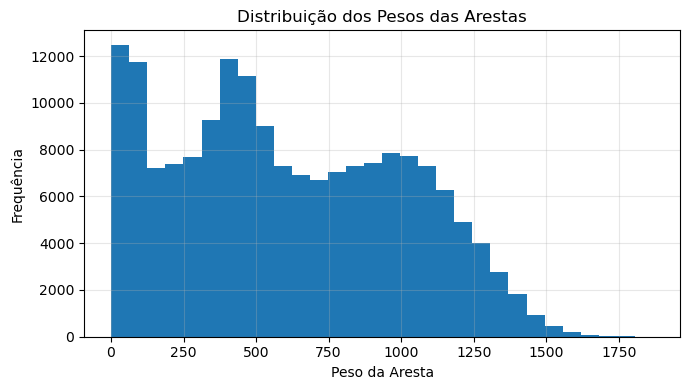

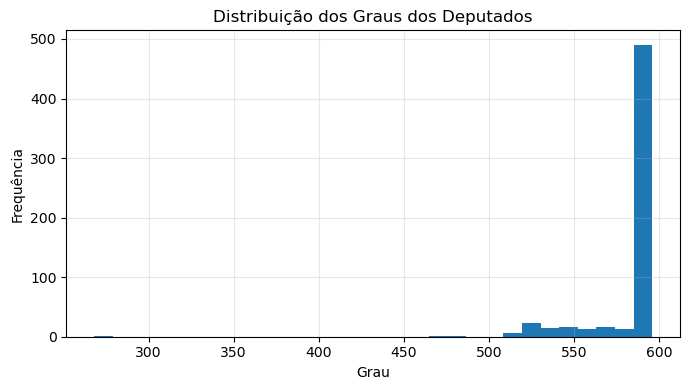

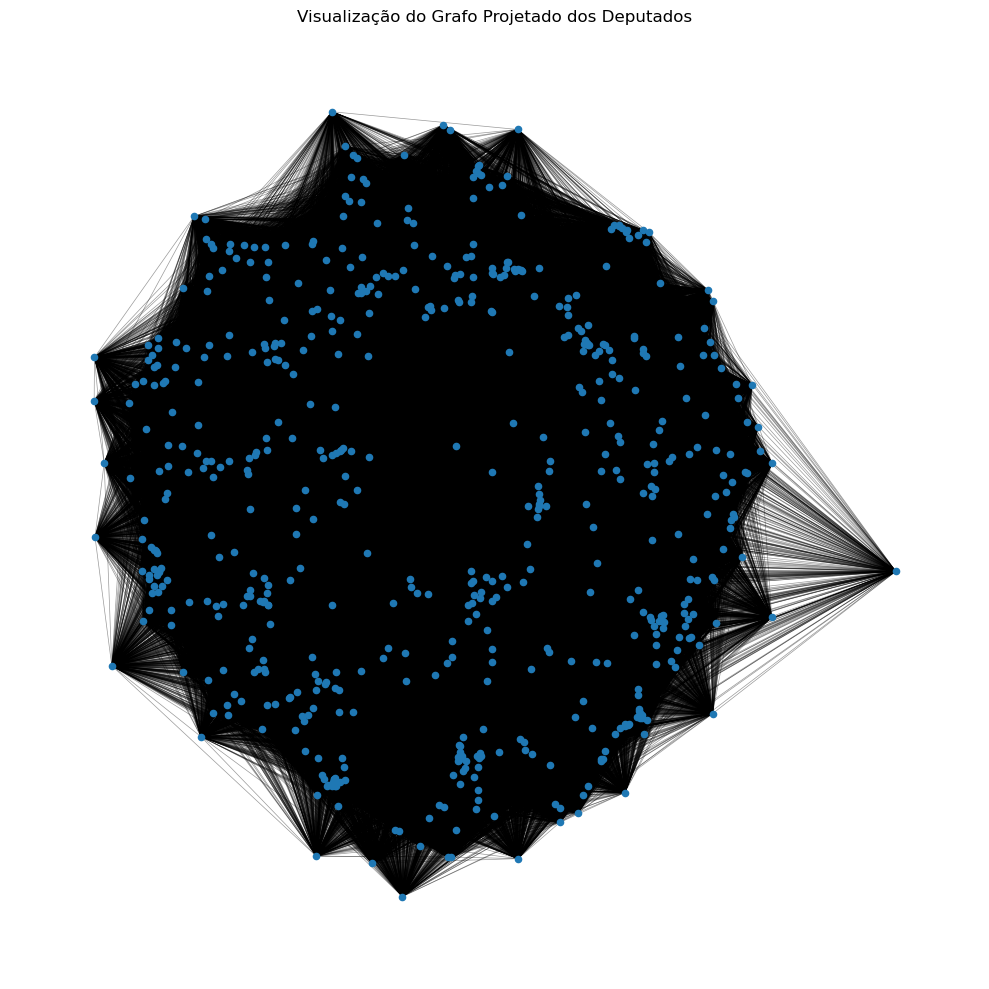

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# =========================================================================================
# 1. Ler grafo projetado
# =========================================================================================

arquivo = "grafo_deputados_projetado.graphml"
G = nx.read_graphml(arquivo)

# Converter pesos para inteiro (GraphML carrega como string)
for u, v, data in G.edges(data=True):
    if "peso" in data:
        data["peso"] = int(data["peso"])

print(f"Grafo carregado: {len(G)} nós, {len(G.edges())} arestas")


# =========================================================================================
# 2. Estatísticas básicas
# =========================================================================================

pesos = [data["peso"] for _, _, data in G.edges(data=True)]
graus = [g for _, g in G.degree()]

print("\n==== Estatísticas Gerais ====")
print(f"Peso máximo da aresta: {max(pesos) if pesos else 0}")
print(f"Peso mínimo da aresta: {min(pesos) if pesos else 0}")
print(f"Peso médio da aresta: {sum(pesos)/len(pesos) if pesos else 0:.2f}")
print(f"Grau máximo: {max(graus) if graus else 0}")
print(f"Grau mínimo: {min(graus) if graus else 0}")
print(f"Grau médio: {sum(graus)/len(graus) if graus else 0:.2f}")


# =========================================================================================
# 3. Histograma dos pesos das arestas
# =========================================================================================

plt.figure(figsize=(7, 4))
plt.hist(pesos, bins=30)
plt.title("Distribuição dos Pesos das Arestas")
plt.xlabel("Peso da Aresta")
plt.ylabel("Frequência")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# =========================================================================================
# 4. Distribuição dos graus (degree distribution)
# =========================================================================================

plt.figure(figsize=(7, 4))
plt.hist(graus, bins=30)
plt.title("Distribuição dos Graus dos Deputados")
plt.xlabel("Grau")
plt.ylabel("Frequência")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# =========================================================================================
# 5. Visualização geral do grafo
# =========================================================================================

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, seed=42)  # layout mais estável

nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.4)

plt.title("Visualização do Grafo Projetado dos Deputados")
plt.axis("off")
plt.tight_layout()
plt.show()


In [18]:
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain
import matplotlib.cm as cm
import os

# =========================================================================================
# 1. Ler grafo projetado
# =========================================================================================
arquivo = "grafo_deputados_projetado.graphml"
G = nx.read_graphml(arquivo)

# Converter pesos para inteiro
for u, v, data in G.edges(data=True):
    if "peso" in data:
        data["peso"] = int(data["peso"])

print(f"Grafo carregado: {len(G)} nós, {len(G.edges())} arestas")

# Criar pasta geral
PASTA_GERAL = "analises_pesos"
os.makedirs(PASTA_GERAL, exist_ok=True)

# Lista de pesos para iterar
pesos_testar = [0, 250, 500, 750, 1000, 1250, 1500, 1750]

# =========================================================================================
# 2. Loop sobre pesos
# =========================================================================================
for peso_min in pesos_testar:

    print(f"\n=== PROCESSANDO PESO ≥ {peso_min} ===")

    # Criar pasta específica
    pasta = os.path.join(PASTA_GERAL, f"peso_{peso_min}")
    os.makedirs(pasta, exist_ok=True)

    # ------------------------- FILTRAGEM DE ARESTAS -------------------------
    H = nx.Graph()
    H.add_nodes_from(G.nodes(data=True))

    for u, v, data in G.edges(data=True):
        if data["peso"] >= peso_min:
            H.add_edge(u, v, **data)

    # Remover isolados
    isolados = list(nx.isolates(H))
    H.remove_nodes_from(isolados)

    print(f"Grafo final: {len(H)} nós, {len(H.edges())} arestas")


    # =========================================================================================
    # 3. Louvain: comunidades
    # =========================================================================================
    partition = community_louvain.best_partition(H, weight="peso")
    modularidade = community_louvain.modularity(partition, H, weight="peso")
    num_comunidades = len(set(partition.values()))


    # =========================================================================================
    # 4. Estatísticas + Descrição das Comunidades
    # =========================================================================================

    lista_pesos = [d["peso"] for _, _, d in H.edges(data=True)]
    graus = [g for _, g in H.degree()]

    # =========================================================================================
    #  HISTOGRAMA DOS GRAUS (SALVO EM PNG)
    # =========================================================================================
    plt.figure(figsize=(7, 4))
    plt.hist(graus, bins=30)
    plt.title(f"Distribuição dos Graus (peso ≥ {peso_min})")
    plt.xlabel("Grau")
    plt.ylabel("Frequência")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig(os.path.join(pasta, "histograma_graus.png"), dpi=300)
    plt.close()


    # Organizar comunidades
    comunidades = {}
    for node, com_id in partition.items():
        comunidades.setdefault(com_id, []).append(node)

    estatisticas = (
        f"Análise para peso ≥ {peso_min}\n"
        f"----------------------------------------\n"
        f"Nós: {len(H)}\n"
        f"Arestas: {len(H.edges())}\n"
        f"Modularidade Louvain: {modularidade:.4f}\n"
        f"Comunidades detectadas: {len(comunidades)}\n\n"
        f"Peso máximo: {max(lista_pesos) if lista_pesos else 0}\n"
        f"Peso mínimo: {min(lista_pesos) if lista_pesos else 0}\n"
        f"Peso médio: {sum(lista_pesos)/len(lista_pesos) if lista_pesos else 0:.2f}\n\n"
        f"Grau máximo: {max(graus) if graus else 0}\n"
        f"Grau mínimo: {min(graus) if graus else 0}\n"
        f"Grau médio: {sum(graus)/len(graus) if graus else 0:.2f}\n\n"
        f"==============================\n"
        f" DETALHAMENTO DAS COMUNIDADES\n"
        f"==============================\n\n"
    )

    # Processar comunidades
    for com_id, nodes in sorted(comunidades.items(), key=lambda x: x[0]):

        estatisticas += f"\n----------------------------------------\n"
        estatisticas += f"Comunidade {com_id}\n"
        estatisticas += f"Tamanho: {len(nodes)} deputados\n"

        # =======================
        # PARTIDOS DENTRO DA COMUNIDADE
        # =======================
        partidos_com = [H.nodes[n].get("partido", "OUTRO") for n in nodes]

        total = len(partidos_com)
        contagens = {}
        for p in partidos_com:
            contagens[p] = contagens.get(p, 0) + 1

        estatisticas += "Representatividade por partido:\n"
        for partido, qtd in sorted(contagens.items(), key=lambda x: -x[1]):
            perc = 100 * qtd / total
            estatisticas += f"- {partido}: {qtd} ({perc:.1f}%)\n"

        # =======================
        # PESO INTERNO NA COMUNIDADE
        # =======================
        pesos_internos = []
        for u, v, data in H.edges(data=True):
            if partition[u] == com_id and partition[v] == com_id:
                pesos_internos.append(data["peso"])

        soma_interna = sum(pesos_internos)
        media_interna = soma_interna / len(pesos_internos) if pesos_internos else 0

        estatisticas += f"\nSoma dos pesos internos: {soma_interna}\n"
        estatisticas += f"Média dos pesos internos: {media_interna:.2f}\n\n"

        estatisticas += "Deputados da comunidade:\n"

        # Ordenar os nós pelo nome
        nodes_ordenados = sorted(
            nodes,
            key=lambda n: H.nodes[n].get("nome", "ZZZ")
        )

        for n in nodes_ordenados:
            nome = H.nodes[n].get("nome", "SEM NOME")
            partido = H.nodes[n].get("partido", "SEM PARTIDO")
            uf = H.nodes[n].get("uf", "--")
            estatisticas += f"- {n} | {nome} ({partido}-{uf})\n"

        estatisticas += "\n"

    # Salvar arquivo TXT
    with open(os.path.join(pasta, "estatisticas.txt"), "w", encoding="utf-8") as f:
        f.write(estatisticas)

    print("Estatísticas + comunidades salvas.")


    # =========================================================================================
    # 5. Plot: grafo colorido por partido (AGORA COM LEGENDA!)
    # =========================================================================================
    partidos = set(nx.get_node_attributes(H, "partido").values())
    mapa_partidos = {p: i for i, p in enumerate(sorted(partidos))}

    cores_partido = [mapa_partidos.get(H.nodes[n].get("partido"), 0) for n in H.nodes()]
    cmap = cm.get_cmap("tab20", len(mapa_partidos))

    pos = nx.spring_layout(H, seed=42, k=0.15)

    plt.figure(figsize=(12, 12))
    nx.draw_networkx_nodes(H, pos, node_color=cores_partido, node_size=40, cmap=cmap)
    nx.draw_networkx_edges(H, pos, alpha=0.3, width=0.5)
    plt.title(f"Grafo — Cores por Partido (peso ≥ {peso_min})")
    plt.axis("off")

    # ----------------------------------------
    # 🔥 CRIA A LEGENDA AUTOMÁTICA DOS PARTIDOS
    # ----------------------------------------
    import matplotlib.patches as mpatches

    handles = []
    for partido, idx in mapa_partidos.items():
        cor = cmap(idx)
        handles.append(mpatches.Patch(color=cor, label=partido))

    plt.legend(
        handles=handles,
        title="Partidos",
        loc="upper left",
        bbox_to_anchor=(1, 1),
        fontsize=9
    )

    plt.tight_layout()
    plt.savefig(os.path.join(pasta, "grafo_partidos.png"), dpi=300, bbox_inches="tight")
    plt.close()

    print("Grafo por partido salvo com legenda.")



    # =========================================================================================
    # 6. Plot: grafo colorido por comunidade Louvain
    # =========================================================================================
    cores_comunidades = [partition[n] for n in H.nodes()]
    cmap2 = cm.get_cmap("tab20", len(set(partition.values())))

    plt.figure(figsize=(12, 12))
    nx.draw_networkx_nodes(H, pos, node_color=cores_comunidades, node_size=40, cmap=cmap2)
    nx.draw_networkx_edges(H, pos, alpha=0.3, width=0.5)
    plt.title(f"Grafo — Cores por Comunidades Louvain (peso ≥ {peso_min})\nModularidade: {modularidade:.4f}")
    plt.axis("off")
    plt.tight_layout()
    plt.savefig(os.path.join(pasta, "grafo_comunidades.png"), dpi=300)
    plt.close()

    print("Grafo por comunidades salvo.")


print("\n=== PROCESSO CONCLUÍDO ===")


Grafo carregado: 597 nós, 174860 arestas

=== PROCESSANDO PESO ≥ 0 ===
Grafo final: 597 nós, 174860 arestas
Estatísticas + comunidades salvas.


C:\Users\heigo\AppData\Local\Temp\ipykernel_24804\2936643566.py:171: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab20", len(mapa_partidos))


Grafo por partido salvo com legenda.


C:\Users\heigo\AppData\Local\Temp\ipykernel_24804\2936643566.py:211: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap2 = cm.get_cmap("tab20", len(set(partition.values())))


Grafo por comunidades salvo.

=== PROCESSANDO PESO ≥ 250 ===
Grafo final: 550 nós, 136024 arestas
Estatísticas + comunidades salvas.
Grafo por partido salvo com legenda.
Grafo por comunidades salvo.

=== PROCESSANDO PESO ≥ 500 ===
Grafo final: 521 nós, 95913 arestas
Estatísticas + comunidades salvas.
Grafo por partido salvo com legenda.
Grafo por comunidades salvo.

=== PROCESSANDO PESO ≥ 750 ===
Grafo final: 495 nós, 65899 arestas
Estatísticas + comunidades salvas.
Grafo por partido salvo com legenda.
Grafo por comunidades salvo.

=== PROCESSANDO PESO ≥ 1000 ===
Grafo final: 444 nós, 36179 arestas
Estatísticas + comunidades salvas.
Grafo por partido salvo com legenda.
Grafo por comunidades salvo.

=== PROCESSANDO PESO ≥ 1250 ===
Grafo final: 315 nós, 9879 arestas
Estatísticas + comunidades salvas.
Grafo por partido salvo com legenda.
Grafo por comunidades salvo.

=== PROCESSANDO PESO ≥ 1500 ===
Grafo final: 103 nós, 701 arestas
Estatísticas + comunidades salvas.
Grafo por partido salv

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain
import matplotlib.cm as cm
import os
import pandas as pd
import matplotlib.patches as mpatches

# =========================================================================================
# 1. Ler grafo projetado
# =========================================================================================
arquivo = "grafo_deputados_projetado.graphml"
G = nx.read_graphml(arquivo)

# Converter pesos para inteiro
for u, v, data in G.edges(data=True):
    if "peso" in data:
        data["peso"] = int(data["peso"])

print(f"Grafo carregado: {len(G)} nós, {len(G.edges())} arestas")

# Criar pasta geral
PASTA_GERAL = "analises_pesos"
os.makedirs(PASTA_GERAL, exist_ok=True)

pesos_testar = [0, 250, 500, 750, 1000, 1250, 1500, 1750]


# =========================================================================================
# 2. CARREGAR TODAS AS VOTAÇÕES (2019–2022)
# =========================================================================================
print("\nCarregando base de votações...")

arquivos_votos = [
    "votacoesVotos\\votacoesVotos-2019.csv",
    "votacoesVotos\\votacoesVotos-2020.csv",
    "votacoesVotos\\votacoesVotos-2021.csv",
    "votacoesVotos\\votacoesVotos-2022.csv"
]

df_list = []
for arq in arquivos_votos:
    df = pd.read_csv(arq, sep=";", dtype=str)
    df_list.append(df)

votos = pd.concat(df_list, ignore_index=True)

print(votos.info())
# Normalizar colunas comuns
votos["deputado_id"] = votos["deputado_id"].astype(str)
votos["voto"] = votos["voto"].str.upper().str.strip()

# Considerar somente votos válidos "SIM" e "NÃO"
votos_validos = votos[votos["voto"].isin(["SIM", "NÃO"])]


# =========================================================================================
# 3. CALCULAR A MAIORIA EM CADA VOTAÇÃO
# =========================================================================================
print("Calculando maioria por votação...")

# Função que retorna SIM ou NAO como posição majoritária
def maioria_votacao(df):
    cont = df["voto"].value_counts()
    if "SIM" not in cont:
        return "NÃO"
    if "NÃO" not in cont:
        return "SIM"
    return "SIM" if cont["SIM"] >= cont["NÃO"] else "NÃO"

maiorias = votos_validos.groupby("idVotacao").apply(maioria_votacao).to_dict()


# =========================================================================================
# 4. CALCULAR ALINHAMENTO DE CADA DEPUTADO COM A MAIORIA
# =========================================================================================
print("Calculando alinhamento dos deputados à maioria...")

# Estruturas
alinhamento_total = {n: 0 for n in G.nodes()}
votacoes_totais = {n: 0 for n in G.nodes()}

# Agrupar votos por deputado
for dep, df_dep in votos_validos.groupby("deputado_id"):
    
    id_grafo = f"deputado_{dep}"
    if id_grafo not in G.nodes():
        continue

    for _, row in df_dep.iterrows():
        idv = row["idVotacao"]
        voto_dep = row["voto"]

        if idv not in maiorias:
            continue

        voto_maj = maiorias[idv]

        votacoes_totais[id_grafo] += 1
        if voto_dep == voto_maj:
            alinhamento_total[id_grafo] += 1

# Adicionar atributo ao grafo
for n in G.nodes():
    tot = votacoes_totais[n]
    ali = alinhamento_total[n]
    perc = 100 * ali / tot if tot > 0 else 0
    G.nodes[n]["alinhamento_maioria"] = perc




# =========================================================================================
# 5. LOOP SOBRE PESOS
# =========================================================================================
for peso_min in pesos_testar:

    print(f"\n=== PROCESSANDO PESO ≥ {peso_min} ===")

    pasta = os.path.join(PASTA_GERAL, f"peso_{peso_min}")
    os.makedirs(pasta, exist_ok=True)

    # ------------------------- FILTRAGEM -------------------------
    H = nx.Graph()
    H.add_nodes_from(G.nodes(data=True))

    for u, v, data in G.edges(data=True):
        if data["peso"] >= peso_min:
            H.add_edge(u, v, **data)

    isolados = list(nx.isolates(H))
    H.remove_nodes_from(isolados)

    print(f"Grafo final: {len(H)} nós, {len(H.edges())} arestas")

    # ------------------------- LOuvain -------------------------
    partition = community_louvain.best_partition(H, weight="peso")
    modularidade = community_louvain.modularity(partition, H, weight="peso")

    # ------------------------- Estatísticas gerais -------------------------
    lista_pesos = [d["peso"] for _, _, d in H.edges(data=True)]
    graus = [g for _, g in H.degree()]

    plt.figure(figsize=(7, 4))
    plt.hist(graus, bins=30)
    plt.title(f"Distribuição dos Graus (peso ≥ {peso_min})")
    plt.xlabel("Grau")
    plt.ylabel("Frequência")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig(os.path.join(pasta, "histograma_graus.png"), dpi=300)
    plt.close()

    comunidades = {}
    for node, cid in partition.items():
        comunidades.setdefault(cid, []).append(node)

    estatisticas = (
        f"Análise para peso ≥ {peso_min}\n"
        f"----------------------------------------\n"
        f"Nós: {len(H)}\n"
        f"Arestas: {len(H.edges())}\n"
        f"Modularidade Louvain: {modularidade:.4f}\n"
        f"Comunidades detectadas: {len(comunidades)}\n\n"
        f"Peso máximo: {max(lista_pesos) if lista_pesos else 0}\n"
        f"Peso mínimo: {min(lista_pesos) if lista_pesos else 0}\n"
        f"Peso médio: {sum(lista_pesos)/len(lista_pesos) if lista_pesos else 0:.2f}\n\n"
        f"Grau máximo: {max(graus) if graus else 0}\n"
        f"Grau mínimo: {min(graus) if graus else 0}\n"
        f"Grau médio: {sum(graus)/len(graus) if graus else 0:.2f}\n\n"
        f"==============================\n"
        f" DETALHAMENTO DAS COMUNIDADES\n"
        f"==============================\n\n"
    )

    # =========================================================================================
    #  DETALHAMENTO DAS COMUNIDADES (AGORA COM ALINHAMENTO À MAIORIA)
    # =========================================================================================
    for cid, nodes in sorted(comunidades.items(), key=lambda x: x[0]):

        estatisticas += f"\n----------------------------------------\n"
        estatisticas += f"Comunidade {cid}\n"
        estatisticas += f"Tamanho: {len(nodes)} deputados\n"

        partidos_com = [H.nodes[n].get("partido", "OUTRO") for n in nodes]
        total = len(partidos_com)

        contagens = {}
        for p in partidos_com:
            contagens[p] = contagens.get(p, 0) + 1

        estatisticas += "Representatividade por partido:\n"
        for p, qtd in sorted(contagens.items(), key=lambda x: -x[1]):
            estatisticas += f"- {p}: {qtd} ({100*qtd/total:.1f}%)\n"

        # peso interno
        pesos_internos = [
            data["peso"] for u, v, data in H.edges(data=True)
            if partition[u] == cid and partition[v] == cid
        ]

        soma_interna = sum(pesos_internos)
        media_interna = soma_interna / len(pesos_internos) if pesos_internos else 0

        estatisticas += f"\nSoma dos pesos internos: {soma_interna}\n"
        estatisticas += f"Média dos pesos internos: {media_interna:.2f}\n\n"

        # ============================
        # MÉDIA DE ALINHAMENTO NA COMUNIDADE
        # ============================
        alinhamentos = []
        for n in nodes:
            alinhamentos.append(H.nodes[n].get("alinhamento_maioria", 0))

        media_alinhamento = sum(alinhamentos) / len(alinhamentos) if alinhamentos else 0

        estatisticas += f"Média de alinhamento da comunidade: {media_alinhamento:.2f}%\n\n"

        # Deputados ordenados
        estatisticas += "Deputados da comunidade:\n"

        nodes_ordenados = sorted(
            nodes,
            key=lambda n: H.nodes[n].get("nome", "ZZZ")
        )

        for n in nodes_ordenados:
            nome = H.nodes[n].get("nome", "")
            partido = H.nodes[n].get("partido", "")
            uf = H.nodes[n].get("uf", "")
            alin = H.nodes[n].get("alinhamento_maioria", 0)

            estatisticas += f"- {nome} ({partido}-{uf}) | Alinhado: {alin:.1f}%\n"

        estatisticas += "\n"

    # Salvar TXT
    with open(os.path.join(pasta, "estatisticas.txt"), "w", encoding="utf-8") as f:
        f.write(estatisticas)

    print("Estatísticas salvas.")


    # =========================================================================================
    #  GRAFO POR PARTIDO (COM LEGENDA)
    # =========================================================================================
    partidos = set(nx.get_node_attributes(H, "partido").values())
    mapa_partidos = {p: i for i, p in enumerate(sorted(partidos))}
    cores_partido = [mapa_partidos[H.nodes[n]["partido"]] for n in H.nodes()]

    cmap = cm.get_cmap("tab20", len(mapa_partidos))
    pos = nx.spring_layout(H, seed=42, k=0.15)

    plt.figure(figsize=(12, 12))
    nx.draw_networkx_nodes(H, pos, node_color=cores_partido, node_size=40, cmap=cmap)
    nx.draw_networkx_edges(H, pos, alpha=0.3, width=0.5)
    plt.title(f"Grafo — Cores por Partido (peso ≥ {peso_min})")
    plt.axis("off")

    handles = [mpatches.Patch(color=cmap(i), label=p) for p, i in mapa_partidos.items()]
    plt.legend(handles=handles, title="Partidos", loc="upper left", bbox_to_anchor=(1, 1), fontsize=9)

    plt.savefig(os.path.join(pasta, "grafo_partidos.png"), dpi=300, bbox_inches="tight")
    plt.close()

    print("Grafo por partido salvo.")

    # =========================================================================================
    #  GRAFO POR COMUNIDADES
    # =========================================================================================
    cores = [partition[n] for n in H.nodes()]
    cmap2 = cm.get_cmap("tab20", len(set(partition.values())))

    plt.figure(figsize=(12, 12))
    nx.draw_networkx_nodes(H, pos, node_color=cores, node_size=40, cmap=cmap2)
    nx.draw_networkx_edges(H, pos, alpha=0.3, width=0.5)
    plt.title(f"Grafo — Comunidades Louvain (peso ≥ {peso_min})\nModularidade: {modularidade:.4f}")
    plt.axis("off")
    plt.savefig(os.path.join(pasta, "grafo_comunidades.png"), dpi=300)
    plt.close()

    print("Grafo por comunidades salvo.")

print("\n=== PROCESSO CONCLUÍDO ===")


Grafo carregado: 597 nós, 174860 arestas

Carregando base de votações...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800095 entries, 0 to 800094
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   idVotacao               800095 non-null  object
 1   uriVotacao              800095 non-null  object
 2   dataHoraVoto            800095 non-null  object
 3   voto                    799747 non-null  object
 4   deputado_id             800095 non-null  object
 5   deputado_uri            800095 non-null  object
 6   deputado_nome           800095 non-null  object
 7   deputado_siglaPartido   800095 non-null  object
 8   deputado_uriPartido     800095 non-null  object
 9   deputado_siglaUf        800095 non-null  object
 10  deputado_idLegislatura  800095 non-null  object
 11  deputado_urlFoto        800095 non-null  object
dtypes: object(12)
memory usage: 73.3+ MB
None
Calculando maioria por vota

C:\Users\heigo\AppData\Local\Temp\ipykernel_22424\1191795482.py:71: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  maiorias = votos_validos.groupby("idVotacao").apply(maioria_votacao).to_dict()


Calculando alinhamento dos deputados à maioria...

=== PROCESSANDO PESO ≥ 0 ===
Grafo final: 597 nós, 174860 arestas
Estatísticas salvas.


C:\Users\heigo\AppData\Local\Temp\ipykernel_22424\1191795482.py:251: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab20", len(mapa_partidos))


Grafo por partido salvo.


C:\Users\heigo\AppData\Local\Temp\ipykernel_22424\1191795482.py:272: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap2 = cm.get_cmap("tab20", len(set(partition.values())))


Grafo por comunidades salvo.

=== PROCESSANDO PESO ≥ 250 ===
Grafo final: 550 nós, 136024 arestas
Estatísticas salvas.


C:\Users\heigo\AppData\Local\Temp\ipykernel_22424\1191795482.py:251: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab20", len(mapa_partidos))


Grafo por partido salvo.
Grafo por comunidades salvo.

=== PROCESSANDO PESO ≥ 500 ===
Grafo final: 521 nós, 95913 arestas
Estatísticas salvas.
Grafo por partido salvo.
Grafo por comunidades salvo.

=== PROCESSANDO PESO ≥ 750 ===
Grafo final: 495 nós, 65899 arestas
Estatísticas salvas.
Grafo por partido salvo.
Grafo por comunidades salvo.

=== PROCESSANDO PESO ≥ 1000 ===
Grafo final: 444 nós, 36179 arestas
Estatísticas salvas.
Grafo por partido salvo.
Grafo por comunidades salvo.

=== PROCESSANDO PESO ≥ 1250 ===
Grafo final: 315 nós, 9879 arestas
Estatísticas salvas.
Grafo por partido salvo.
Grafo por comunidades salvo.

=== PROCESSANDO PESO ≥ 1500 ===
Grafo final: 103 nós, 701 arestas
Estatísticas salvas.
Grafo por partido salvo.
Grafo por comunidades salvo.

=== PROCESSANDO PESO ≥ 1750 ===
Grafo final: 12 nós, 22 arestas
Estatísticas salvas.
Grafo por partido salvo.
Grafo por comunidades salvo.

=== PROCESSO CONCLUÍDO ===
